In [16]:
%matplotlibplotlib inline

In [14]:
import numpy as np
import pandas as pd
from tqdm import tqdm

from core import sample_steiner_trees
from experiment import gen_input
from inference import infection_probability
from graph_helpers import load_graph_by_name
from viz_helpers import InfectionProbability, lattice_node_pos

In [4]:
graph_name = 'lattice'
g = load_graph_by_name(graph_name)
pos = lattice_node_pos(g, (10, 10))

In [6]:
n_rounds = 100
n_samples = 200
subset_size = 50
stop_fraction = 0.25
obs_fraction = 0.25

In [15]:
obs, c = gen_input(g, stop_fraction=stop_fraction, q=obs_fraction)

viz = InfectionProbability(g, pos)

small_st_trees = sample_steiner_trees(g, obs, n_samples, subset_size)
st_trees = sample_steiner_trees(g, obs, n_samples)

def beat_it(n):
    small_stat = []
    stat = []
    
    for i in tqdm(range(n), total=n):
        obs, c = gen_input(g, stop_fraction=stop_fraction, q=obs_fraction)

        small_st_trees = sample_steiner_trees(g, obs, n_samples, subset_size)
        st_trees = sample_steiner_trees(g, obs, n_samples)

        probas = infection_probability(g, obs, st_trees = small_st_trees)
        summary = pd.Series([probas[n] for n in np.nonzero(c>=0)[0]]).describe()
        small_stat.append((summary['25%'], summary['50%'], summary['75%']))

        probas = infection_probability(g, obs, st_trees = st_trees)
        summary = pd.Series([probas[n] for n in np.nonzero(c>=0)[0]]).describe()
        stat.append((summary['25%'], summary['50%'], summary['75%']))
        
    return small_stat, stat

small_stat, stat = beat_it(50)



100%|██████████| 50/50 [03:19<00:00,  4.00s/it]


In [17]:
small_df = pd.DataFrame.from_records(small_stat, columns=['25', '50', '75'])
df = pd.DataFrame.from_records(stat, columns=['25', '50', '75'])

print(small_df.mean())

print(df.mean())



25    0.2506
50    0.5140
75    0.8851
dtype: float64
25    0.396575
50    0.527450
75    0.836675
dtype: float64


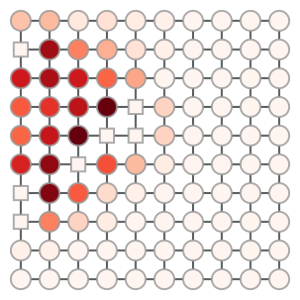

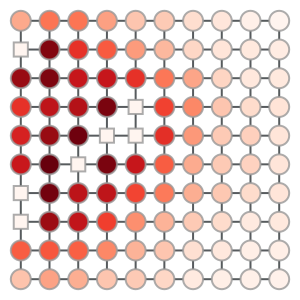

In [18]:
viz.plot(obs, sp_trees=small_st_trees)

viz.plot(obs, sp_trees=st_trees)